# Digital Kesehatan

## Problem
Data yang akan dianalisa didapatkan dari pasien dimulai dari administrasi, hasil pemeriksaan, monitoring dalam rawat inap maupun rawat jalan, tracking asuransi, estimasi nominal biaya, pembayaran dan pasien kembali pulih. Data tersebut terpusat dalam satu server. Data tersebut dapat divisualisasikan berbagai macam summary sehingga pasien mendapatkan transparansi informasi serta perusahaan mendapatkan insight untuk evaluasi pelayanan.

## Business Problem

## Data Preparation

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

### Read dataframe

In [2]:
df = pd.read_csv("csv/hasil_dummy.csv")
df.head()

,id,date_in,date_out,branch,hospital_care,drug_quantity,admin_price,cogs,payment,review,...,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue,created_at,is_DBD
0,30591,2020-01-01,2020-01-03,RSMD,Rawat Inap,4,50000,13719597,Asuransi,Netral,...,900000.0,600000,240000.0,15000000,90000,495000.0,17535000,3815403,2024-05-02 09:28:45.585259,False
1,46456,2020-01-01,2020-01-05,RSMA,Rawat Inap,1,50000,14625784,Pribadi,Sangat Tidak Puas,...,1500000.0,1250000,550000.0,15000000,200000,825000.0,19485000,4859216,2024-05-02 09:28:45.585265,False
2,99188,2020-01-01,2020-01-01,RSMD,Rawat Jalan,5,50000,3859519,Pribadi,Sangat Puas,...,300000.0,0,0.0,0,90000,0.0,990000,-2869519,2024-05-02 09:28:45.585267,False
3,23001,2020-01-01,2020-01-05,RSMA,Rawat Inap,2,50000,6086762,Asuransi,Netral,...,1500000.0,1500000,750000.0,4000000,150000,825000.0,8925000,2838238,2024-05-02 09:28:45.585268,False
4,29319,2020-01-01,2020-01-02,RSMS,Rawat Inap,3,50000,3003078,Asuransi,Sangat Tidak Puas,...,600000.0,600000,300000.0,0,200000,330000.0,2305000,-698078,2024-05-02 09:28:45.585268,False


In [3]:
df.shape

(9474, 43)

In [4]:
# Filter only for DBD Suspect
df = df[df['is_DBD'] == True]
df.head()

,id,date_in,date_out,branch,hospital_care,drug_quantity,admin_price,cogs,payment,review,...,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue,created_at,is_DBD
9,36434,2020-01-01,2020-01-01,RSMD,Rawat Jalan,3,50000,1090736,Pribadi,Sangat Tidak Puas,...,300000.0,0,0.0,0,90000,0.0,590000,-500736,2024-05-02 09:28:45.585271,True
51,37182,2020-01-07,2020-01-07,RSMD,Rawat Jalan,1,50000,1900825,Pribadi,Puas,...,250000.0,0,0.0,0,200000,0.0,550000,-1350825,2024-05-02 09:28:45.585294,True
71,88444,2020-01-11,2020-01-13,RSMS,Rawat Inap,5,50000,4821621,Asuransi,Sangat Puas,...,750000.0,750000,330000.0,0,200000,495000.0,2825000,-1996621,2024-05-02 09:28:45.585305,True
150,16458,2020-01-21,2020-01-21,RSMS,Rawat Jalan,3,50000,2171651,Pribadi,Sangat Puas,...,300000.0,0,0.0,0,200000,0.0,700000,-1471651,2024-05-02 09:28:45.585350,True
161,21894,2020-01-23,2020-01-23,RSMD,Rawat Jalan,3,50000,4792984,Pribadi,Puas,...,300000.0,0,0.0,0,90000,0.0,560000,-4232984,2024-05-02 09:28:45.585357,True


In [5]:
df.shape

(539, 43)

## Exploratory Data Analysis (EDA)

In [6]:
df.sample(5)

,id,date_in,date_out,branch,hospital_care,drug_quantity,admin_price,cogs,payment,review,...,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue,created_at,is_DBD
556,80754,2020-03-19,2020-03-23,RSMA,Rawat Inap,2,50000,4647756,Asuransi,Sangat Puas,...,1250000.0,750000,250000.0,0,195000,825000.0,3420000,-1227756,2024-05-02 09:28:45.585589,True
8832,56299,2023-09-18,2023-09-19,RSMS,Rawat Inap,1,50000,2518737,Asuransi,Sangat Puas,...,500000.0,400000,160000.0,0,90000,330000.0,1640000,-878737,2024-05-02 09:28:45.589982,True
9262,12240,2023-11-30,2023-11-30,RSMA,Rawat Jalan,5,50000,2762557,Pribadi,Sangat Puas,...,300000.0,0,0.0,0,90000,0.0,640000,-2122557,2024-05-02 09:28:45.590208,True
4427,47003,2021-10-06,2021-10-07,RSMD,Rawat Inap,2,50000,3135226,Pribadi,Puas,...,500000.0,500000,220000.0,0,195000,330000.0,1875000,-1260226,2024-05-02 09:28:45.587575,True
5856,20818,2022-05-22,2022-05-27,RSMS,Rawat Inap,4,50000,1998747,Asuransi,Tidak Puas,...,1500000.0,1200000,480000.0,0,200000,990000.0,4860000,2861253,2024-05-02 09:28:45.588372,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 9 to 9392
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   539 non-null    int64  
 1   date_in              539 non-null    object 
 2   date_out             539 non-null    object 
 3   branch               539 non-null    object 
 4   hospital_care        539 non-null    object 
 5   drug_quantity        539 non-null    int64  
 6   admin_price          539 non-null    int64  
 7   cogs                 539 non-null    int64  
 8   payment              539 non-null    object 
 9   review               539 non-null    object 
 10  patient_id           539 non-null    int64  
 11  room_id              539 non-null    int64  
 12  drug_id              539 non-null    int64  
 13  doctor_id            539 non-null    int64  
 14  surgery_id           539 non-null    int64  
 15  lab_id               539 non-null    int64  

In [8]:
# Convert date objects to dates
df['date_in'] = pd.to_datetime(df['date_in'])
df['date_out'] = pd.to_datetime(df['date_out'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 9 to 9392
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   539 non-null    int64         
 1   date_in              539 non-null    datetime64[ns]
 2   date_out             539 non-null    datetime64[ns]
 3   branch               539 non-null    object        
 4   hospital_care        539 non-null    object        
 5   drug_quantity        539 non-null    int64         
 6   admin_price          539 non-null    int64         
 7   cogs                 539 non-null    int64         
 8   payment              539 non-null    object        
 9   review               539 non-null    object        
 10  patient_id           539 non-null    int64         
 11  room_id              539 non-null    int64         
 12  drug_id              539 non-null    int64         
 13  doctor_id            539 non-null    in

In [10]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df.isna().sum()/len(df))

Missing Values
id                       0
date_in                  0
date_out                 0
branch                   0
hospital_care            0
drug_quantity            0
admin_price              0
cogs                     0
payment                  0
review                   0
patient_id               0
room_id                  0
drug_id                  0
doctor_id                0
surgery_id               0
lab_id                   0
patient_name             0
gender                   0
age                      0
room_type              241
food_price             241
room_price             241
drug_brand               0
drug_type                0
drug_price               0
doctor                   0
doctor_price             0
surgery                539
surgery_price          539
lab                      0
lab_price                0
drug_price_total         0
days_diff                0
doctor_visit_price       0
room_price_total         0
food_price_total         0
surgery_price

In [11]:
# Fill missing values in categorical columns (forgot to change it in dags)
categorical_cols = ["room_type", "surgery", "lab"]
df[categorical_cols] = df[categorical_cols].fillna("Tidak Digunakan")

# Fill missing values in numerical columns
numerical_cols = ["food_price", "room_price", "surgery_price", "lab_price"]
df[numerical_cols] = df[numerical_cols].fillna(0)

In [12]:
# Data Duplicate
df.duplicated().sum()

0

In [13]:
# Grouping columns by data type
cats = []
nums = []
temps = []

for column, dtype in df.dtypes.items():
    if dtype == 'object' or dtype == 'bool':
        cats.append(column)
    elif dtype == 'int64' or dtype == 'float64':
        nums.append(column)
    elif dtype == 'datetime64[ns]':
        temps.append(column)

# Display the grouped columns
print("Categorical columns:", cats)
print("Numerical columns:", nums)
print("Temporal columns:", temps)


Categorical columns: ['branch', 'hospital_care', 'payment', 'review', 'patient_name', 'gender', 'room_type', 'drug_brand', 'drug_type', 'doctor', 'surgery', 'lab', 'is_DBD']
Numerical columns: ['id', 'drug_quantity', 'admin_price', 'cogs', 'patient_id', 'room_id', 'drug_id', 'doctor_id', 'surgery_id', 'lab_id', 'age', 'food_price', 'room_price', 'drug_price', 'doctor_price', 'surgery_price', 'lab_price', 'drug_price_total', 'days_diff', 'doctor_visit_price', 'room_price_total', 'food_price_total', 'surgery_price_total', 'lab_price_total', 'infus_price_total', 'total_amount', 'revenue']
Temporal columns: ['date_in', 'date_out', 'created_at']


In [14]:
#Statistik Deskriptif kolom numerikal
df[nums].describe()

,id,drug_quantity,admin_price,cogs,patient_id,room_id,drug_id,doctor_id,surgery_id,lab_id,...,drug_price_total,days_diff,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue
count,539.000000,539.000000,539.0,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539.0,539.000000,...,539.000000,539.000000,5.390000e+02,5.390000e+02,539.000000,539.0,539.000000,539.000000,5.390000e+02,5.390000e+02
mean,54908.519481,2.951763,50000.0,2.993519e+06,5034.756957,1.417440,6.525046,3.504638,0.0,2.667904,...,190538.033395,2.233766,7.334879e+05,5.027829e+05,218293.135436,0.0,163460.111317,368571.428571,2.227134e+06,-7.663850e+05
std,26342.041830,1.419949,0.0,1.126522e+06,2691.032265,1.523713,3.487741,0.500443,0.0,1.682821,...,133414.857150,2.248728,5.002751e+05,5.323823e+05,247215.082087,0.0,50164.634019,371040.058359,1.619082e+06,2.018107e+06
min,10189.000000,1.000000,50000.0,1.008802e+06,10.000000,0.000000,1.000000,3.000000,0.0,1.000000,...,40000.000000,0.000000,2.500000e+05,0.000000e+00,0.000000,0.0,90000.000000,0.000000,4.300000e+05,-4.409955e+06
25%,31245.000000,2.000000,50000.0,2.024529e+06,2755.000000,0.000000,3.000000,3.000000,0.0,1.000000,...,100000.000000,0.000000,3.000000e+05,0.000000e+00,0.000000,0.0,90000.000000,0.000000,6.600000e+05,-2.274538e+06
50%,55322.000000,3.000000,50000.0,3.017703e+06,5237.000000,1.000000,7.000000,4.000000,0.0,2.000000,...,160000.000000,2.000000,6.000000e+05,4.500000e+05,160000.000000,0.0,195000.000000,330000.000000,1.990000e+06,-9.958430e+05
75%,78305.500000,4.000000,50000.0,3.965024e+06,7363.000000,3.000000,9.000000,4.000000,0.0,5.000000,...,250000.000000,4.000000,1.200000e+06,9.000000e+05,400000.000000,0.0,200000.000000,660000.000000,3.642500e+06,6.415510e+05
max,99994.000000,5.000000,50000.0,4.998849e+06,9393.000000,4.000000,12.000000,4.000000,0.0,5.000000,...,550000.000000,6.000000,1.800000e+06,1.800000e+06,900000.000000,0.0,200000.000000,990000.000000,5.990000e+06,4.583371e+06


In [15]:
# Statistik deskriptif kolom kategorikal
df[cats].describe()

,branch,hospital_care,payment,review,patient_name,gender,room_type,drug_brand,drug_type,doctor,surgery,lab,is_DBD
count,539,539,539,539,539,539,539,539,539,539,539,539,539
unique,3,2,2,5,539,2,5,9,3,2,1,3,1
top,RSMA,Rawat Inap,Pribadi,Sangat Puas,Widya Samosir,Perempuan,Tidak Digunakan,Tramadol,Umum,Umum,Tidak Digunakan,Serologi,True
freq,181,298,386,116,1,276,241,76,193,272,539,191,539


In [16]:
# Statistik deskriptif kolom temporal
df[temps].describe()

,date_in,date_out,created_at
count,539,539,539
mean,2022-01-23 22:39:51.094619648,2022-01-25 15:00:20.037105664,2024-05-02 09:28:45.587927040
min,2020-01-01 00:00:00,2020-01-01 00:00:00,2024-05-02 09:28:45.585271
25%,2021-01-29 00:00:00,2021-01-31 00:00:00,2024-05-02 09:28:45.586718464
50%,2022-02-12 00:00:00,2022-02-15 00:00:00,2024-05-02 09:28:45.588047104
75%,2023-01-23 00:00:00,2023-01-26 00:00:00,2024-05-02 09:28:45.589150464
max,2023-12-21 00:00:00,2023-12-25 00:00:00,2024-05-02 09:28:45.590276


## Univariate Analysis

### Numerical columns

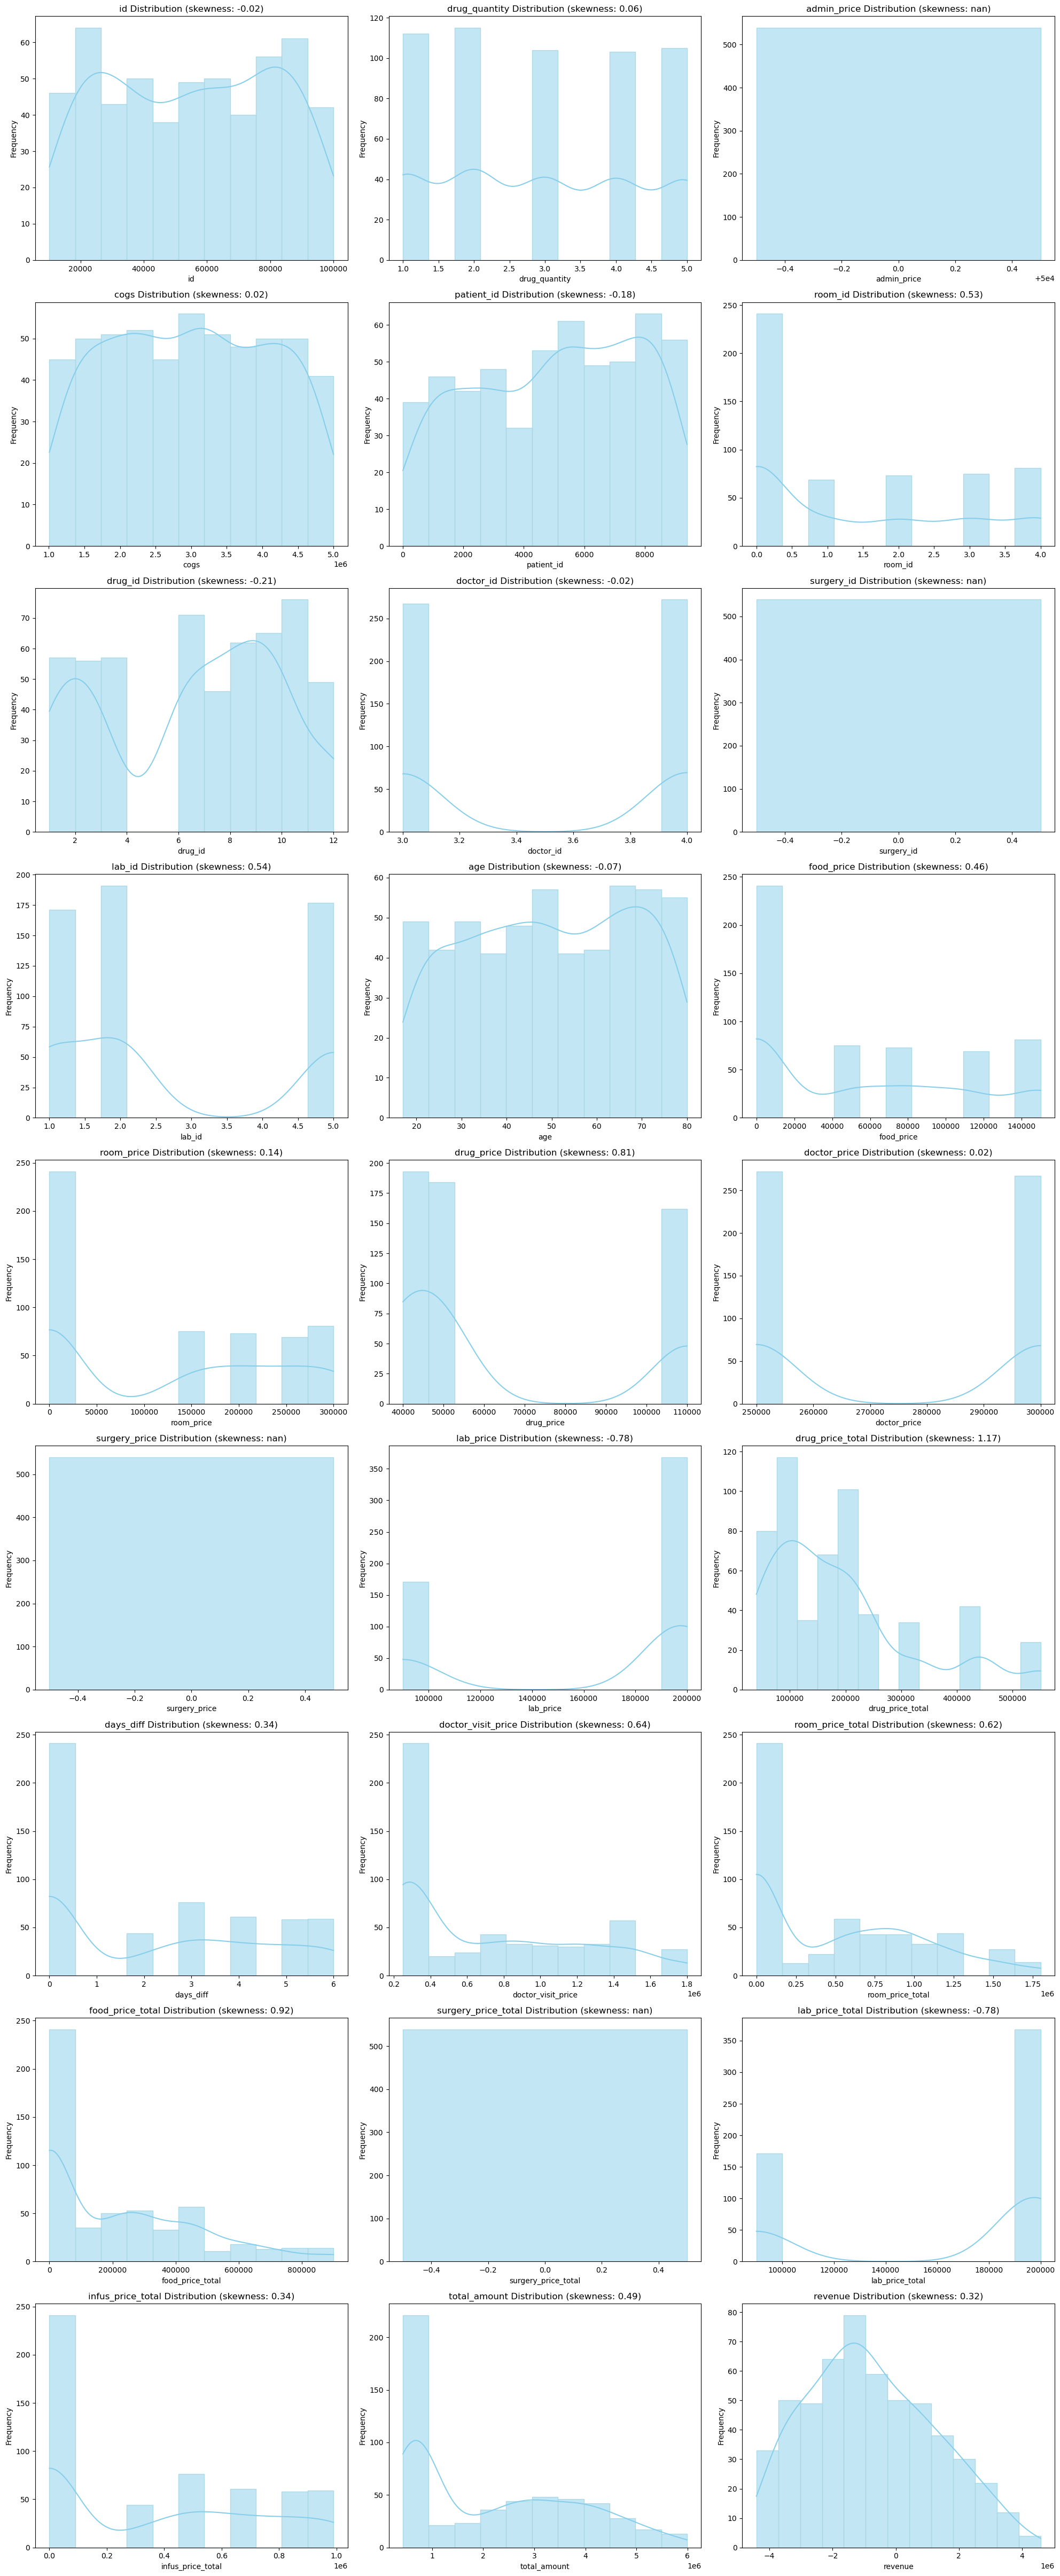

In [17]:
# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

# Loop through each numerical column
for i, column in enumerate(nums):
    ax = plt.subplot(grid[i])
    skewness = skew(df[column])
    sns.histplot(data=df, x=column, kde=True, color='skyblue', edgecolor='lightblue', ax=ax)
    ax.set_title(f'{column} Distribution (skewness: {skewness:.2f})')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Categorical columns

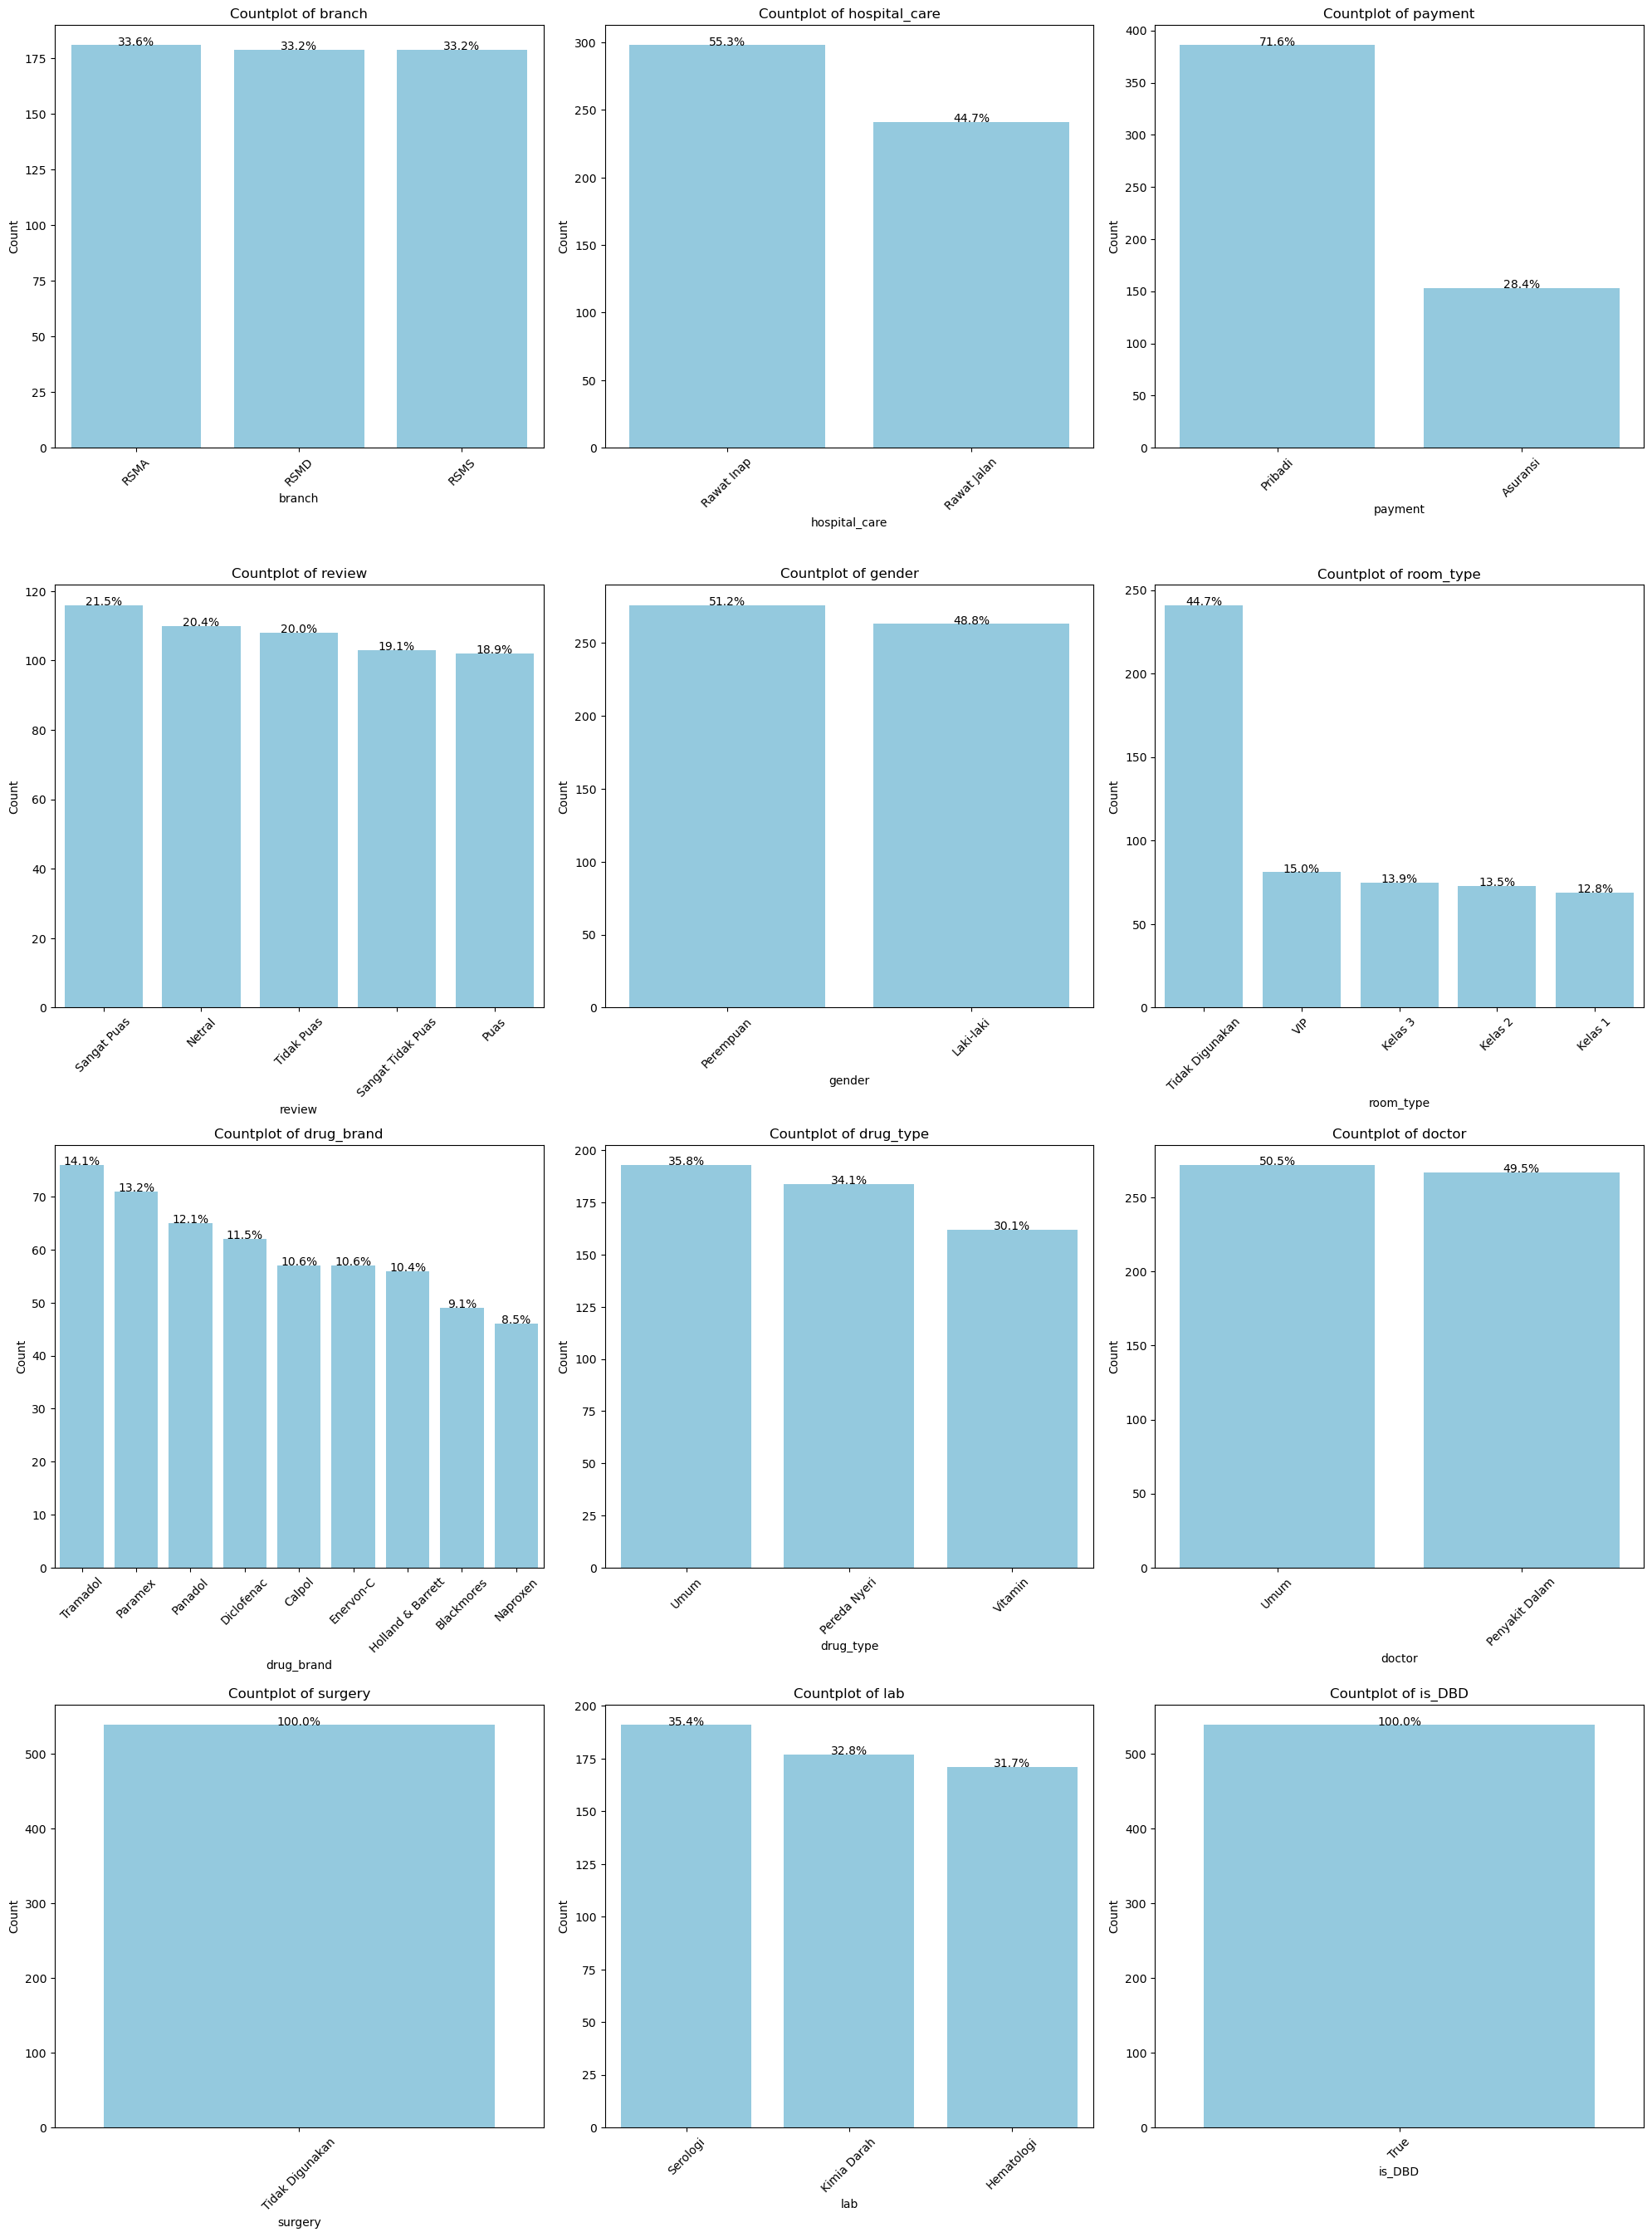

In [18]:
# List of categorical columns
cat_cols = [col for col in cats if col != 'patient_name']

# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*5))

# Loop through categorical features and plot bar charts
for i, feature in enumerate(cat_cols):
    ax = plt.subplot(grid[i])
    sns.countplot(data=df, x=feature, ax=ax, order=df[feature].value_counts().index, color='skyblue')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Calculate percentages and annotate bars
    total = float(len(df[feature]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.02
        ax.annotate(percentage, (x, y), ha='center')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Numerical columns

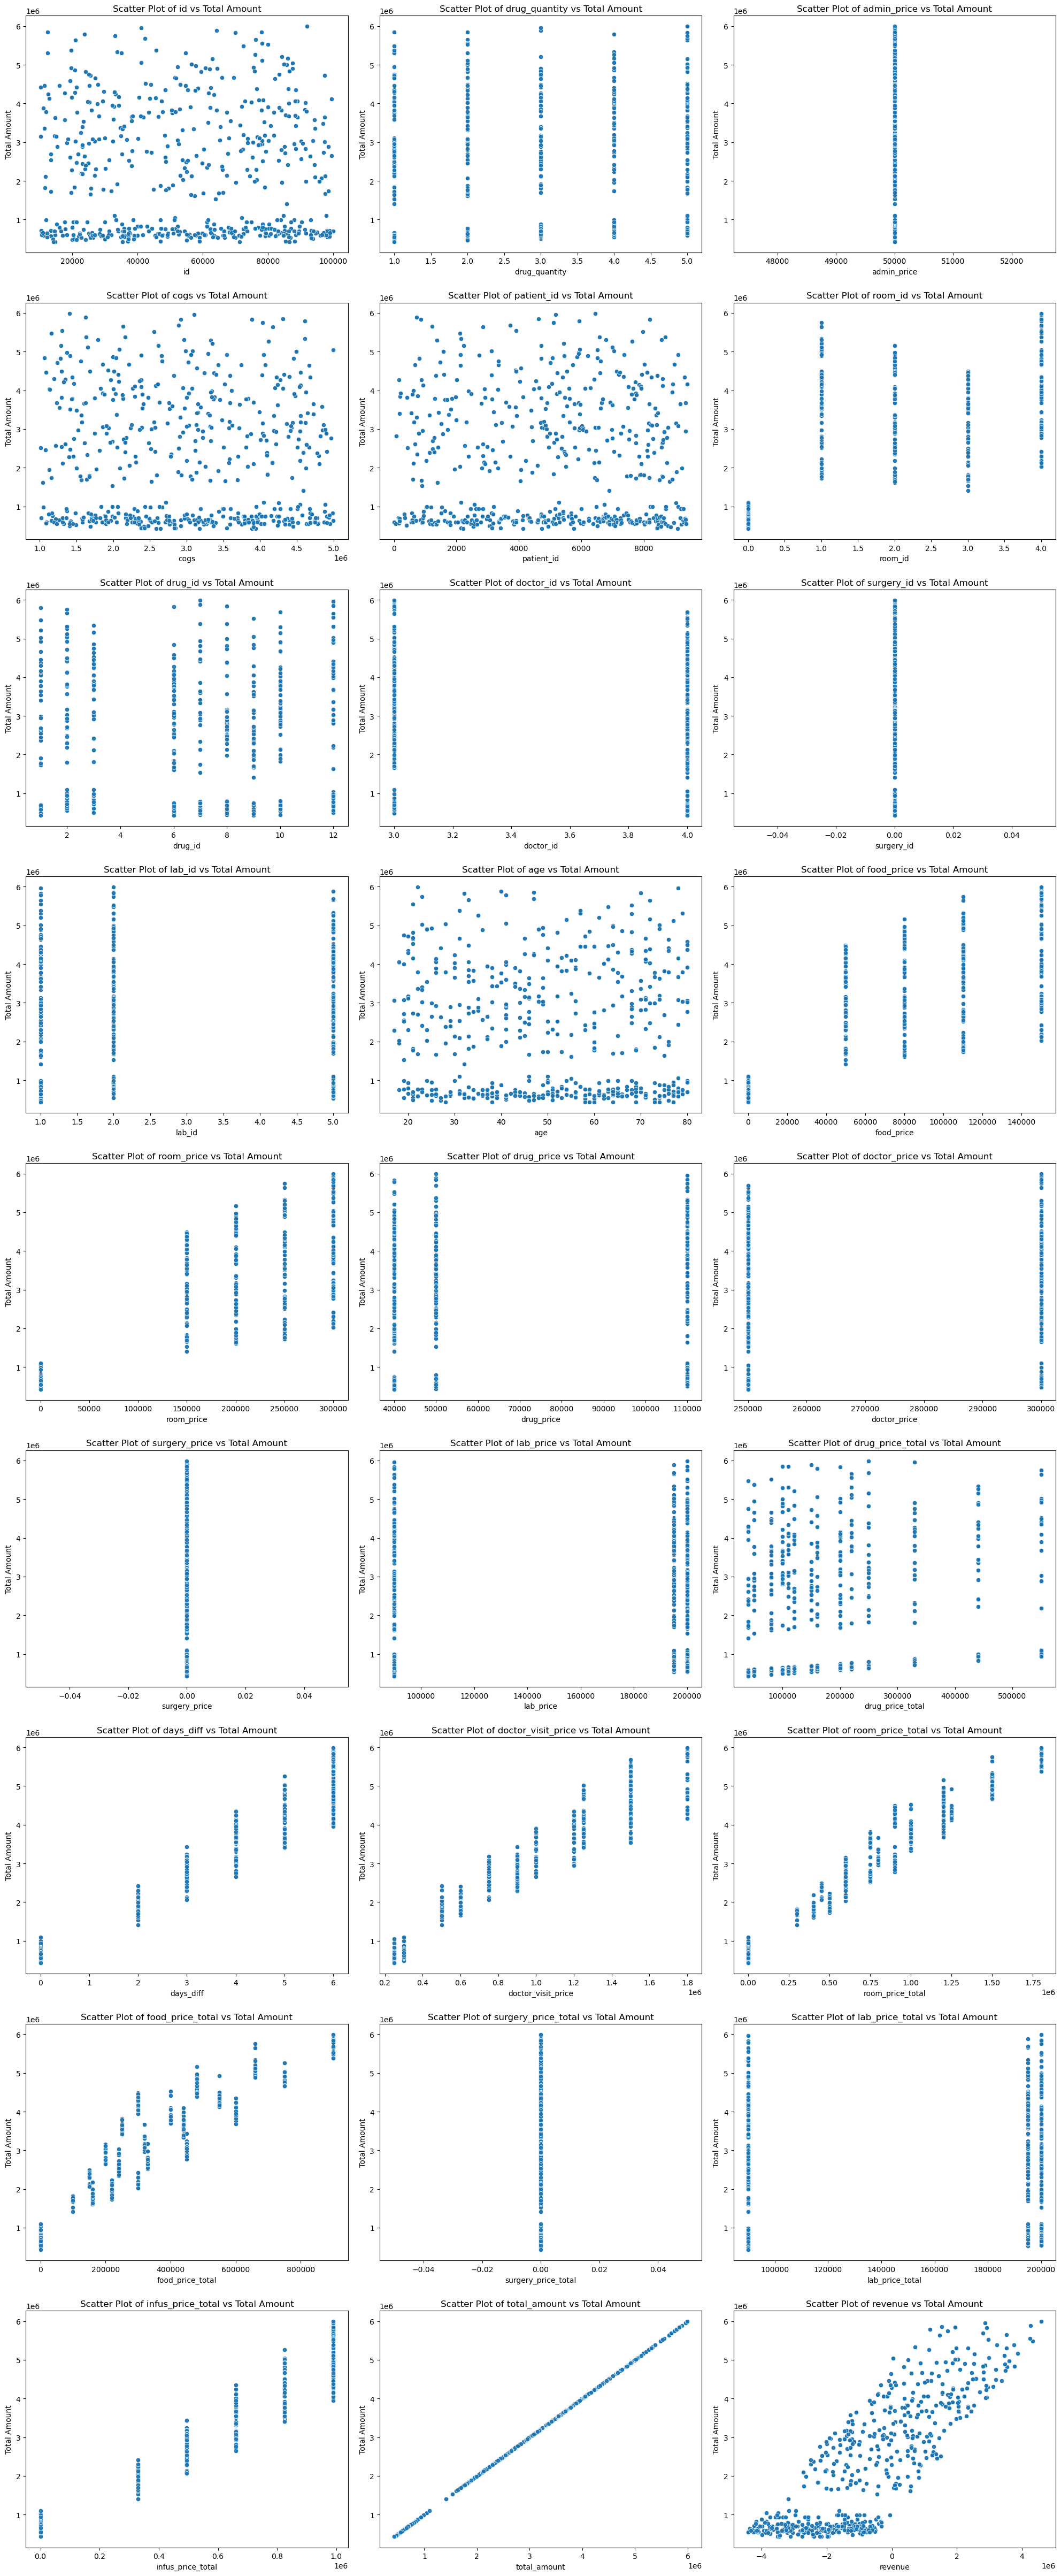

In [19]:
# Create grid of subplots
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

# Plot scatter plots
for n, col in enumerate(nums):
    ax = plt.subplot(grid[n])
    sns.scatterplot(x=col, y='total_amount', data=df, ax=ax)
    ax.set_title(f'Scatter Plot of {col} vs Total Amount')
    ax.set_xlabel(col)
    ax.set_ylabel('Total Amount')

plt.tight_layout()
plt.show()

### Categorical columns

In [20]:
# List of categorical columns
cat_cols = [col for col in cats if col != 'patient_name']

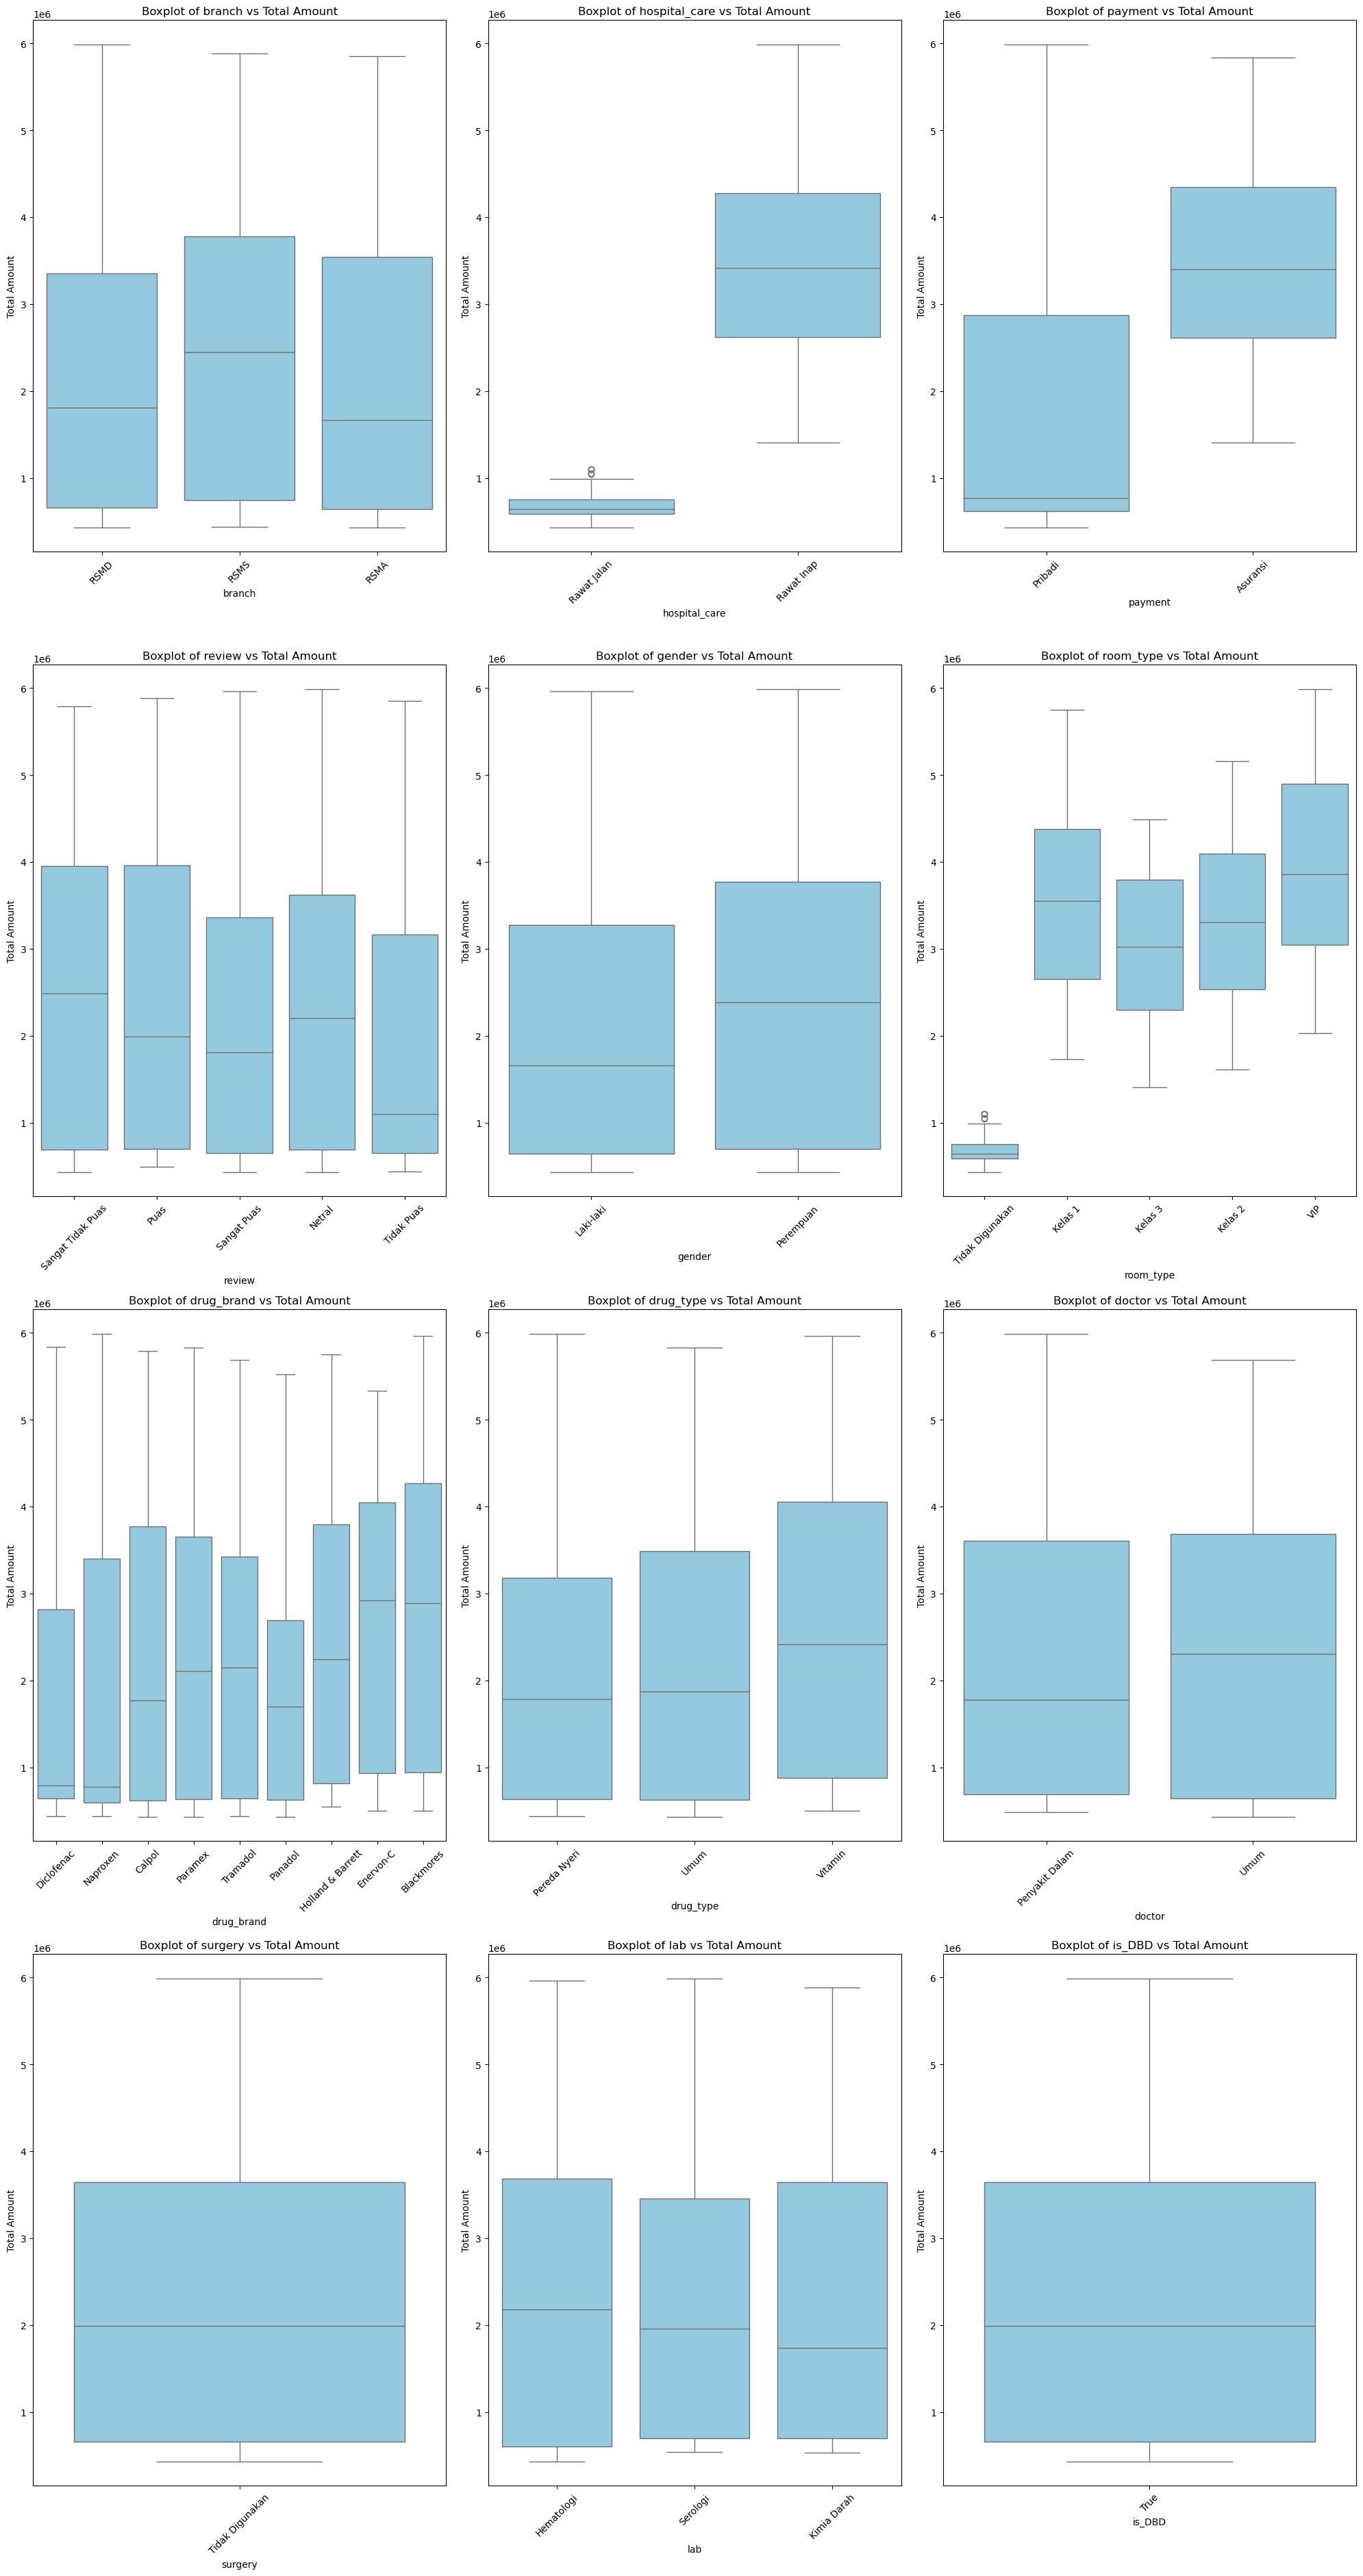

In [21]:
# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*7))

# Plot box plots for each categorical column against 'total_amount'
for i, col in enumerate(cat_cols):
    ax = plt.subplot(grid[i])
    sns.boxplot(x=col, y='total_amount', data=df, ax=ax, color='skyblue')
    ax.set_title(f'Boxplot of {col} vs Total Amount')
    ax.set_xlabel(col)
    ax.set_ylabel('Total Amount')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Multivariate Analysis

### Numerical columns

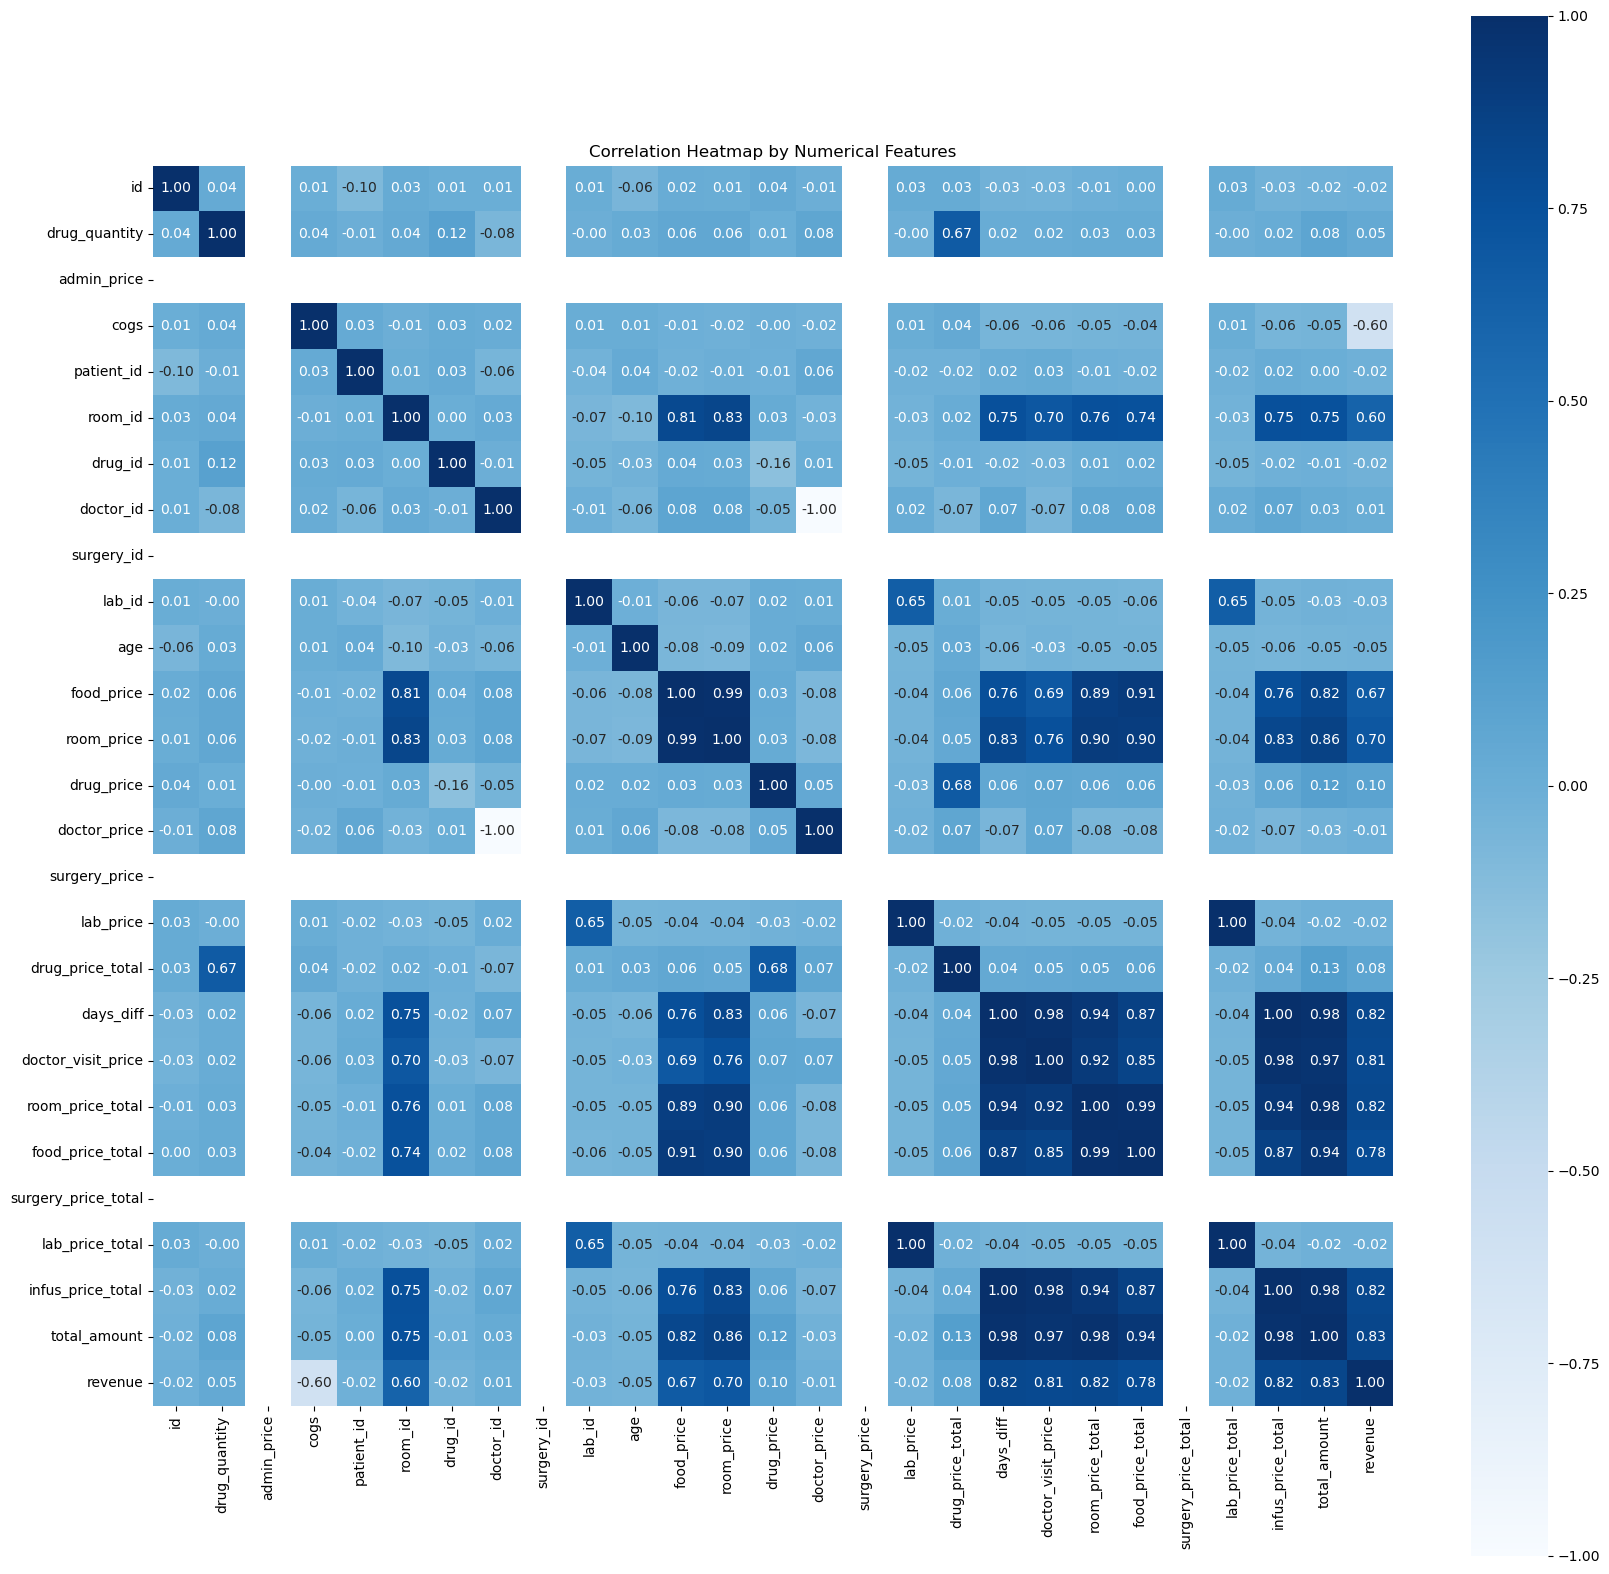

In [22]:
# Subset the DataFrame with only the numerical features
numerical_df = df[nums]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap by Numerical Features')
plt.show()

### Categorical columns

In [23]:
from scipy.stats import chi2_contingency

# Create a contingency table for each combination of categorical variable and the target variable
chi_square_results = {}

for column in cat_cols:
    contingency_table = pd.crosstab(df[column], df['total_amount'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[column] = {'chi2': chi2, 'p-value': p}

# Display the results
for column, result in chi_square_results.items():
    print(f"Chi-square test for {column} vs {'total_amount'}:")
    print(f"Chi-square value: {result['chi2']}")
    print(f"P-value: {result['p-value']}")
    print('-' * 30)

Chi-square test for branch vs total_amount:
Chi-square value: 625.6900202681153
P-value: 0.42857113082389553
------------------------------
Chi-square test for hospital_care vs total_amount:
Chi-square value: 539.0
P-value: 1.370688791597761e-14
------------------------------
Chi-square test for payment vs total_amount:
Chi-square value: 484.88826238612893
P-value: 7.551989275886488e-10
------------------------------
Chi-square test for review vs total_amount:
Chi-square value: 1227.299261974218
P-value: 0.5958090328503773
------------------------------
Chi-square test for gender vs total_amount:
Chi-square value: 305.4800312876937
P-value: 0.5618279514226932
------------------------------
Chi-square test for room_type vs total_amount:
Chi-square value: 1964.5454751873174
P-value: 1.0064900706369356e-35
------------------------------
Chi-square test for drug_brand vs total_amount:
Chi-square value: 2702.2632305797615
P-value: 0.0010501009594942872
------------------------------
Chi-squ

* Nilai chi-squared yang mendekati nol menunjukkan bahwa tidak ada perbedaan signifikan antara distribusi observed dan expected.
* Nilai p-value adalah 1, itu biasanya menunjukkan bahwa tidak ada perbedaan yang signifikan antara sampel yang diuji. Hal ini bisa terjadi jika sampel yang diuji memiliki distribusi yang sama persis.

In [24]:
column_to_drop = ['id', 'patient_id', 'room_id', 'drug_id', 'doctor_id', 'surgery_id', 'lab_id', 'patient_name', 'created_at',
                 'admin_price', 'drug_price_total', 'doctor_visit_price', 'room_price_total', 'food_price_total',
                  'surgery_price_total', 'lab_price_total', 'infus_price_total', 'revenue', 'cogs',
                  'surgery_price', 'surgery', 'is_DBD']

## Data Cleansing

In [25]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df.isna().sum()/len(df))

Missing Values
id                     0
date_in                0
date_out               0
branch                 0
hospital_care          0
drug_quantity          0
admin_price            0
cogs                   0
payment                0
review                 0
patient_id             0
room_id                0
drug_id                0
doctor_id              0
surgery_id             0
lab_id                 0
patient_name           0
gender                 0
age                    0
room_type              0
food_price             0
room_price             0
drug_brand             0
drug_type              0
drug_price             0
doctor                 0
doctor_price           0
surgery                0
surgery_price          0
lab                    0
lab_price              0
drug_price_total       0
days_diff              0
doctor_visit_price     0
room_price_total       0
food_price_total       0
surgery_price_total    0
lab_price_total        0
infus_price_total      0
total_amou

In [26]:
df.duplicated().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 9 to 9392
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   539 non-null    int64         
 1   date_in              539 non-null    datetime64[ns]
 2   date_out             539 non-null    datetime64[ns]
 3   branch               539 non-null    object        
 4   hospital_care        539 non-null    object        
 5   drug_quantity        539 non-null    int64         
 6   admin_price          539 non-null    int64         
 7   cogs                 539 non-null    int64         
 8   payment              539 non-null    object        
 9   review               539 non-null    object        
 10  patient_id           539 non-null    int64         
 11  room_id              539 non-null    int64         
 12  drug_id              539 non-null    int64         
 13  doctor_id            539 non-null    in

In [28]:
# # Filtering Outliers using Z-score
# # Penjelasan: Filtering hanya dilakukan pada kolom
# # Kolom-kolom ini diharapkan menjadi fitur yang akan digunakan pada pemodelan dan dapat memprediksi 

# from scipy import stats

# print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

# filtered_entries = np.array([True] * len(df))

# for col in ['drug_quantity','cogs','room_price','food_price','drug_price', 'doctor_price', 'surgery_price']:
#     zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
#     filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
# df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

# print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

## Feature Engineering

In [29]:
# Define age groups
age_bins = [0, 18, 30, 45, 60, float('inf')]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']

# Assign age groups to the data
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

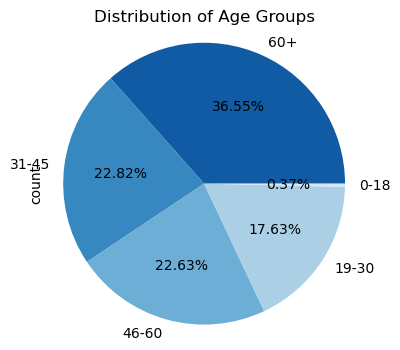

In [30]:
# Plot the pie chart
custom_palette = sns.color_palette('Blues_r', len(df['age_group'].unique()))
plt.figure(figsize=(4, 4))
df['age_group'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=custom_palette)
plt.title('Distribution of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


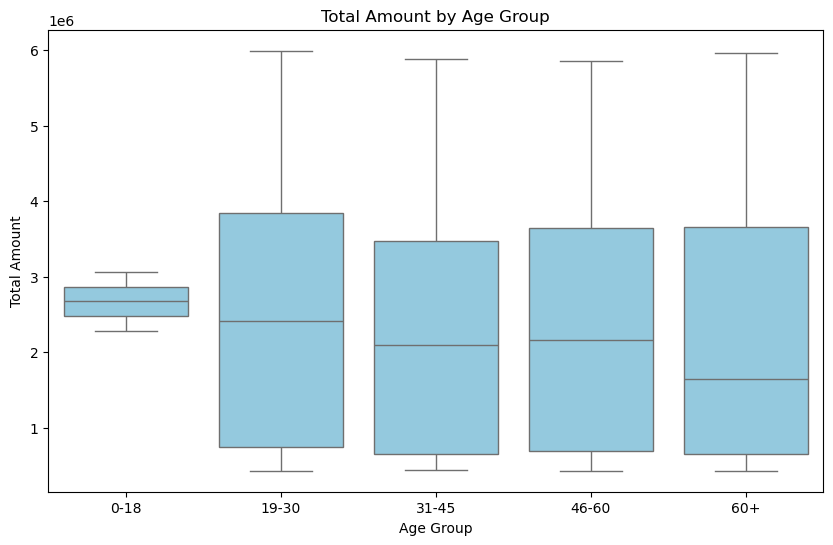

In [31]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='total_amount', data=df, color='skyblue')
plt.title('Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

In [32]:
df_copy = df
df_copy['date_in_year'] = df_copy['date_in'].dt.year
df_copy['date_in_year']

9       2020
51      2020
71      2020
150     2020
161     2020
        ... 
9337    2023
9342    2023
9345    2023
9352    2023
9392    2023
Name: date_in_year, Length: 539, dtype: int32

In [33]:
df_copy['date_in_month'] = df_copy['date_in'].dt.month
df_copy['date_in_month']

9        1
51       1
71       1
150      1
161      1
        ..
9337    12
9342    12
9345    12
9352    12
9392    12
Name: date_in_month, Length: 539, dtype: int32

In [34]:
df_copy['date_out_year'] = df_copy['date_out'].dt.year
df_copy['date_out_year']

9       2020
51      2020
71      2020
150     2020
161     2020
        ... 
9337    2023
9342    2023
9345    2023
9352    2023
9392    2023
Name: date_out_year, Length: 539, dtype: int32

In [35]:
df_copy['date_out_month'] = df_copy['date_out'].dt.month
df_copy['date_out_month']

9        1
51       1
71       1
150      1
161      1
        ..
9337    12
9342    12
9345    12
9352    12
9392    12
Name: date_out_month, Length: 539, dtype: int32

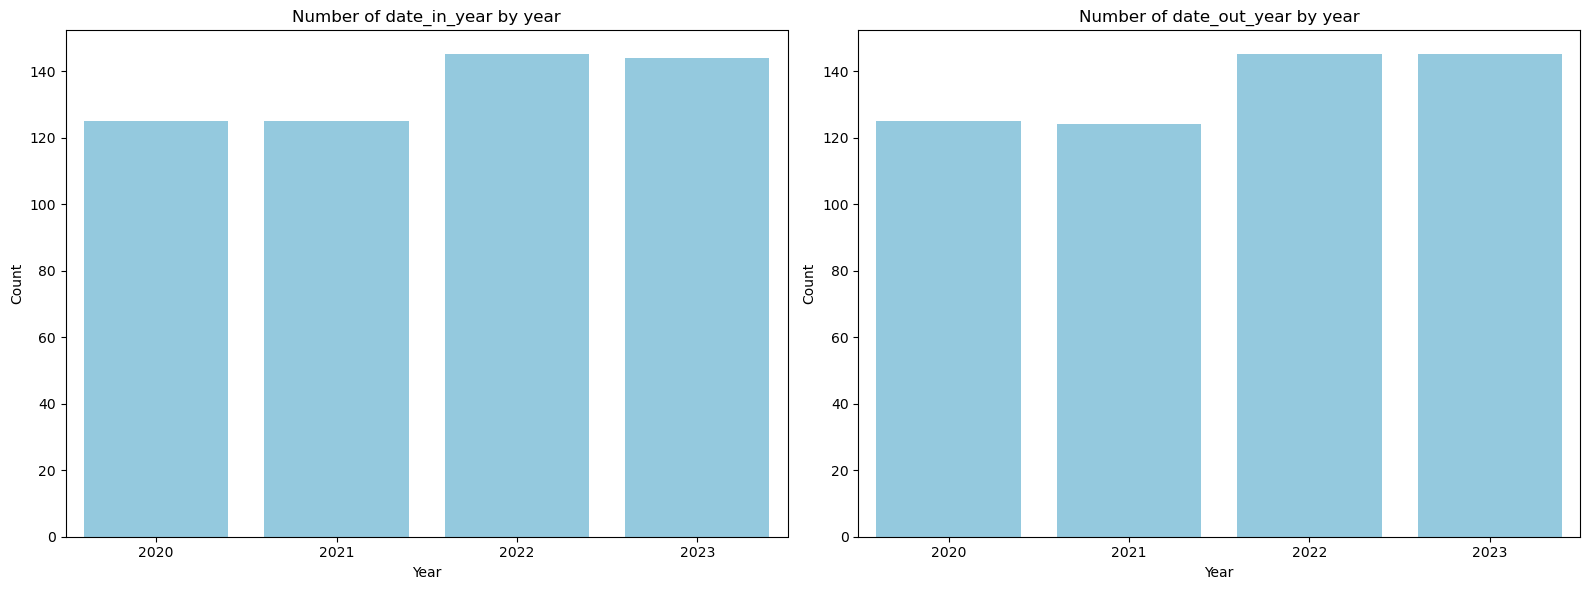

In [36]:
# List of columns to visualize
date_columns = ['date_in_year', 'date_out_year']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(date_columns), figsize=(16, 6))

# Loop through date_columns and plot countplots
for i, column in enumerate(date_columns):
    sns.countplot(x=df_copy[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Number of {column} by year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### label encoding untuk data ordinal

In [37]:
# Label encode (mapping) age_group
age_mapping = {'0-18': 0, '19-30': 1, '31-45': 2, '46-60': 3, '60+': 4}
df['age_group'] = df['age_group'].replace(age_mapping).astype(int)

# Label encode (mapping) review
review_mapping = {'Sangat Tidak Puas': 0, 'Tidak Puas': 1, 'Netral': 2, 'Puas': 3, 'Sangat Puas': 4}
df['review_encoded'] = df['review'].replace(review_mapping).astype(int)

# Label encode (mapping) room_type
room_mapping = {'Tidak Digunakan': 0, 'Kelas 3': 1, 'Kelas 2': 2, 'Kelas 1': 3, 'VIP': 4}
df['room_type_encoded'] = df['room_type'].replace(room_mapping).astype(int)

### One-hot encoding (data non-ordinal)

In [38]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

onehot_cols = ['branch', 'hospital_care', 'payment', 'gender', 'drug_brand', 'drug_type', 'doctor', 'lab']

for col in onehot_cols:
    onehots = pd.get_dummies(df[col], prefix=col, dtype=int)  # Specify dtype=int to convert to integers
    df = df.join(onehots)
    df = df.drop(col, axis=1)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 9 to 9392
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            539 non-null    int64         
 1   date_in                       539 non-null    datetime64[ns]
 2   date_out                      539 non-null    datetime64[ns]
 3   drug_quantity                 539 non-null    int64         
 4   admin_price                   539 non-null    int64         
 5   cogs                          539 non-null    int64         
 6   review                        539 non-null    object        
 7   patient_id                    539 non-null    int64         
 8   room_id                       539 non-null    int64         
 9   drug_id                       539 non-null    int64         
 10  doctor_id                     539 non-null    int64         
 11  surgery_id                    539 no

In [40]:
correlation = df[['age', 'age_group', 'date_in_year', 'date_in_month', 'date_out_year', 'date_out_month']].corrwith(df['total_amount'])
correlation_sorted = correlation.sort_index()

print(correlation_sorted)

age              -0.047720
age_group        -0.052541
date_in_month    -0.022759
date_in_year      0.006623
date_out_month   -0.023670
date_out_year     0.010833
dtype: float64


In [41]:
column_to_drop = column_to_drop + ['date_in', 'date_out', 'age', 
                                   'hospital_care_Rawat Jalan', 'gender_Perempuan', 'payment_Pribadi',
                                   'review', 'room_type', 'surgery',
                                   'date_in_month', 'date_in_year', 'date_out_year', 'date_out_month',
                                   'review_encoded'
                                  ]

In [42]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# calculate correlation and print correlation_sorted
correlation = df.select_dtypes(include=[np.number]).corrwith(df['total_amount'])
#correlation_sorted = correlation.sort_index()
correlation_sorted = correlation.abs().sort_values(ascending=False)

print(correlation_sorted)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

total_amount                    1.000000
room_price_total                0.981422
days_diff                       0.976603
infus_price_total               0.976603
doctor_visit_price              0.967646
food_price_total                0.943792
hospital_care_Rawat Inap        0.861361
hospital_care_Rawat Jalan       0.861361
room_price                      0.859377
revenue                         0.830170
food_price                      0.822647
room_type_encoded               0.798541
room_id                         0.749924
payment_Asuransi                0.489552
payment_Pribadi                 0.489552
drug_price_total                0.133685
drug_type_Vitamin               0.123274
drug_price                      0.120820
branch_RSMS                     0.098553
drug_brand_Blackmores           0.096891
drug_quantity                   0.081387
gender_Laki-laki                0.079521
gender_Perempuan                0.079521
drug_brand_Diclofenac           0.076632
drug_brand_Panad

In [43]:
column_to_drop = column_to_drop + ['doctor_price', 'drug_price', 'food_price', 'lab_price', 'room_price', 'surgery_price']

## Feature Selection

In [44]:
final_df = df.drop(column_to_drop, axis=1)
final_df.head()

,drug_quantity,days_diff,total_amount,age_group,room_type_encoded,branch_RSMA,branch_RSMD,branch_RSMS,hospital_care_Rawat Inap,payment_Asuransi,...,drug_brand_Paramex,drug_brand_Tramadol,drug_type_Pereda Nyeri,drug_type_Umum,drug_type_Vitamin,doctor_Penyakit Dalam,doctor_Umum,lab_Hematologi,lab_Kimia Darah,lab_Serologi
9,3,0.0,590000,2,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
51,1,0.0,550000,2,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
71,5,3.0,2825000,4,3,0,0,1,1,1,...,0,0,1,0,0,0,1,0,0,1
150,3,0.0,700000,4,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
161,3,0.0,560000,3,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [45]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# calculate correlation and print correlation_sorted
correlation = final_df.corrwith(df['total_amount'])
#correlation_sorted = correlation.sort_index()
correlation_sorted = correlation.abs().sort_values(ascending=False)

print(correlation_sorted)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

total_amount                    1.000000
days_diff                       0.976603
hospital_care_Rawat Inap        0.861361
room_type_encoded               0.798541
payment_Asuransi                0.489552
drug_type_Vitamin               0.123274
branch_RSMS                     0.098553
drug_brand_Blackmores           0.096891
drug_quantity                   0.081387
gender_Laki-laki                0.079521
drug_brand_Diclofenac           0.076632
drug_brand_Panadol              0.073394
drug_brand_Enervon-C            0.067110
drug_type_Pereda Nyeri          0.066211
age_group                       0.052541
drug_type_Umum                  0.052408
branch_RSMD                     0.050745
branch_RSMA                     0.047676
lab_Kimia Darah                 0.030132
drug_brand_Naproxen             0.028811
doctor_Penyakit Dalam           0.027722
doctor_Umum                     0.027722
drug_brand_Holland & Barrett    0.026315
lab_Hematologi                  0.021157
lab_Serologi    

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate features and target
X = final_df.drop('total_amount', axis=1)
y = final_df['total_amount']

In [47]:
# Initialize the MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

## Machine Learning Modeling and Evaluation

In [48]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_test.shape

((431, 27), (108, 27))

In [50]:
import numpy as np
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_score

# regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
}

# Loop through the models
for name, model in models.items():
    # Perform cross-validation
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Predictions on the training set
    y_pred_train = model.predict(X_train)

    # Predictions on the test set
    start_time = time.time()
    y_pred_test = model.predict(X_test)
    end_time = time.time()
    prediction_time = end_time - start_time

    # Calculate evaluation metrics for training and test sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f'--------{name} Regression------')
    print("Cross-Validation R²: %.5f (+/- %.5f)" % (cv_scores_r2.mean(), cv_scores_r2.std() * 2))
    print("Training R²: %.5f" % r2_train)
    print("Test R²: %.5f" % r2_test)
    print("Training MSE: %.5f" % mse_train)
    print("Test MSE: %.5f" % mse_test)
    print("Training MAE: %.5f" % mae_train)
    print("Test MAE: %.5f" % mae_test)
    print("Training RMSE: %.5f" % np.sqrt(mse_train))
    print("Test RMSE: %.5f" % np.sqrt(mse_test))
    print("Training MAPE: %.5f" % (mape_train * 100) + '%')
    print("Test MAPE: %.5f" % (mape_test * 100) + '%')
    print(f'Time taken for prediction on test set: {prediction_time:.10f} seconds')
    print('\n')

--------Linear Regression Regression------
Cross-Validation R²: 0.99434 (+/- 0.00294)
Training R²: 0.99518
Test R²: 0.99578
Training MSE: 12237119100.96192
Test MSE: 12089829811.13236
Training MAE: 83477.83807
Test MAE: 79958.81328
Training RMSE: 110621.51283
Test RMSE: 109953.76215
Training MAPE: 5.57739%
Test MAPE: 4.81467%
Time taken for prediction on test set: 0.0000000000 seconds


--------Decision Tree Regression------
Cross-Validation R²: 0.98815 (+/- 0.00619)
Training R²: 1.00000
Test R²: 0.99133
Training MSE: 0.00000
Test MSE: 24836805555.55556
Training MAE: 0.00000
Test MAE: 92731.48148
Training RMSE: 0.00000
Test RMSE: 157596.97191
Training MAPE: 0.00000%
Test MAPE: 3.37666%
Time taken for prediction on test set: 0.0000000000 seconds


--------KNN Regression------
Cross-Validation R²: 0.69575 (+/- 0.03535)
Training R²: 0.81570
Test R²: 0.72606
Training MSE: 467740603248.25989
Test MSE: 784699925925.92590
Training MAE: 475512.76102
Test MAE: 551851.85185
Training RMSE: 683915

## Hyperparameter Tuning Random Search

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
models_tuning = {
    'XGBoost': (XGBRegressor(random_state=42), {
        'max_depth': [3, 6, 9, 12],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 400],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
    })
}

# Loop through the models
for name, (model, param_grid) in models_tuning.items():
    # Create a randomized search for the model
    random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    random_search.fit(X_train, y_train)

    # Get the best hyperparameters and model
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Predictions on the training set
    y_pred_train = best_model.predict(X_train)

    # Predictions on the test set
    start_time = time.time()
    y_pred_test = best_model.predict(X_test)
    end_time = time.time()
    prediction_time = end_time - start_time

    # Calculate evaluation metrics for training and test sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f'--------{name} Regression (Tuned)------')
    print("Cross-Validation R²: %.5f (+/- %.5f)" % (cv_scores_r2.mean(), cv_scores_r2.std() * 2))
    print("Training R²: %.5f" % r2_train)
    print("Test R²: %.5f" % r2_test)
    print("Training MSE: %.5f" % mse_train)
    print("Test MSE: %.5f" % mse_test)
    print("Training MAE: %.5f" % mae_train)
    print("Test MAE: %.5f" % mae_test)
    print("Training RMSE: %.5f" % np.sqrt(mse_train))
    print("Test RMSE: %.5f" % np.sqrt(mse_test))
    print("Training MAPE: %.5f" % (mape_train * 100) + '%')
    print("Test MAPE: %.5f" % (mape_test * 100) + '%')
    print(f'Time taken for prediction on test set: {prediction_time:.10f} seconds')
    print('\n')

--------XGBoost Regression (Tuned)------
Cross-Validation R²: 0.99732 (+/- 0.00154)
Training R²: 0.99994
Test R²: 0.99933
Training MSE: 148423314.15405
Test MSE: 1926154664.62879
Training MAE: 8966.73079
Test MAE: 27319.43258
Training RMSE: 12182.91074
Test RMSE: 43887.97859
Training MAPE: 0.56867%
Test MAPE: 1.14425%
Time taken for prediction on test set: 0.0000000000 seconds




## Deployment